# INTRO
- Just because we can report an image as containing a stop sign does not mean we can report exactly where in the image the stop sign is.
- Simple image classification algorithms can only give us a global labeling and categorization of an image. They cannot provide local labelings of the image and tell us where the stop sign is, where the railroad is, etc

## Objectives
- Learn difference between global image classification and local object detection

## Object Detectors
- An object can be a chair, person or a car.
- Objects in the real-world can exhibit substantial variations in viewpoint, scale, deformation, occlusion, illumination, background clutter, and intra-class variation.
- Good object detector should be robust to changes in these properties and still be able to detect the presence of the object, even under less-than-ideal circumstance
- In real-world, it is used in
    - Detecting the presence of faces in images.
    - Security systems
    - Automated vehicle parking garages, where computer vision techniques can be used to detect if a parking spot is open or not.
    - Visual Search: To identify each piece of clothing in the image.

# TEMPLATE MATCHING
- Extremely and practically effortless but has a major drawback of only working under very specific conditions.
- To apply template matching, we need to gather two images:
    - Source image
    - Template image: Object patch we are searching for in source image.
- To find template in the source image, we slide the template from left-to-right and top-to-bottom across the source.
- At each $(x,y)$ location, a metric is calculated to represent how good or bad the match is. For this, we use correlation coefficient to determine how similar the pixel intensities of the two patches
$$
R(x,y) = \sum_{x',y'}(T'(x',y').I'(x+x',y+y'))
$$
where
$$
T'(x',y') = T(x',y') - 1/(w.h).\sum_{x'',y''}T(x'',y'')
$$
$$
I'(x+x',y+y') = I(x+x',y+y') - 1/(w.h).\sum_{x'',y''}I'(x+x'',y+y'') 
$$
- For each location T over I, the computed result metric is stored in our result matrix R. Each (x, y)-coordinate in the source image (that also has a valid width and height for the template image) contains an entry in the result matrix R
- Ensure that the template you are detecting is nearly identical to the object you want to detect in the source.
- the bounding box we detect is only going to be as large as the template . Unless we extend our code to apply multi-scale template matching, we will never be able to place a full bounding box surrounding the larger coffee mug.
- In order to build more powerful object detectors, we’ll need to leverage more advanced computer vision and machine learning techniques, including image pyramids, sliding windows, and non-maxima suppression.

In [1]:
import sys
sys.path.append("../../")

In [2]:
import cv2
from cv_imshow import display_image, create_subplot
from matplotlib import pyplot as plt

In [3]:
args = {
    "source1":"../../images/template_matching/source_01.jpg",
    "source2":"../../images/template_matching/source_02.jpg",
    "source3":"../../images/template_matching/source_03.jpg",
    "template":"../../images/template_matching/template.jpg"
}

In [4]:
def match_template(source, template):
    fig = plt.figure(figsize=(10,10))
    source = cv2.imread(source)
    template = cv2.imread(template)
    (tempH, tempW) = template.shape[:2]

    #find template in source 
    result = cv2.matchTemplate(source, template, cv2.TM_CCOEFF)
    (minVal, maxVal, minLoc, (x,y))  = cv2.minMaxLoc(result)

    #draw bounding rect
    cv2.rectangle(source,(x,y), (x+tempW,y+tempH), (0,255,0), 2)

    #display image
    create_subplot(fig, 1, 2, 1, "Source", source)
    create_subplot(fig, 1, 2, 2, "Template", template)

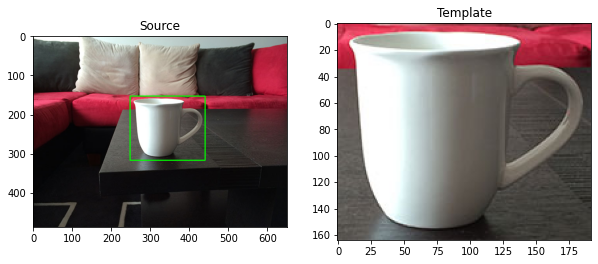

In [5]:
match_template(args["source1"], args["template"])

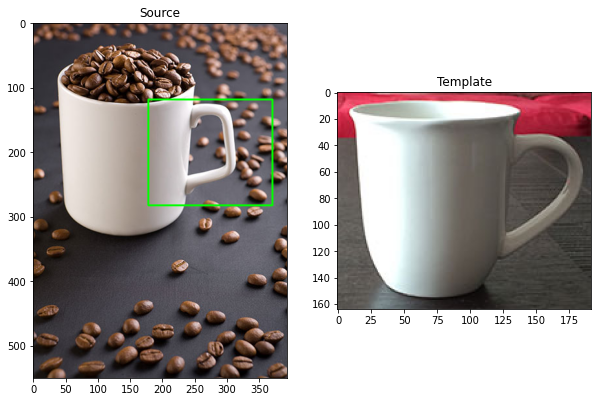

In [6]:
match_template(args["source2"], args["template"])

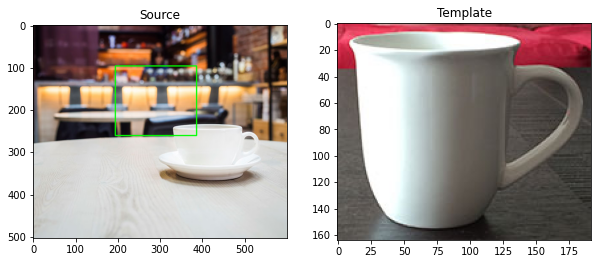

In [7]:
match_template(args["source3"], args["template"])